<h1> Постановка задачи </h1> <br>
<h3> <b>Задача:</b><br>
Написать нейронную сеть, которая будет принимать на вход картинку размером 28х28 пикселей, на которой изображена какая-то цифра и определять что это за цифра </h3>

<h3> <b>Описание модели:</b> <br>
Данная нейросеть написана с помощью библиотеки <b>tensorflow</b> и модуля <b>keras</b>. Был использован датасет <b>mnist</b> для обучающей и тренеровочной выборки. Была использована модель типа Sequential, то есть слои идут последовательно. В качестве функции активации была использована функция ReLU на скрытом слое, а на выходном слое использовалась фанкция SoftMax. Использовался оптимизатор Стохастический градиентный спуск (SGD), а в качестве функции потерь использовалась категориальная кросс энтропия. Опимальное количество эпох было выявлено эксперементальным путем и составляет 13 (чтобы не было переобучения) </h3>

<h3> <b>Про результаты можно сказать несколько вещей</b>:
<ul>
  <li> Средняя вероятность успешного предсказания модели примерно 96.5 процентов </li>
  <li> Было выявлено эксперементальным путем, что количество нейронов на скрытом слое должно быть ровно 128, в этом случае будут самые хорошие предсказания </li>
  <li> Иногда модель показывает неверные ответы, это можно посмотреть в разделе, связанном с демонстрацией результатов (в этом случае надписи подсвечиваются красным цветом) </li>
</ul> </h3>

<h3> <b> Итог: </b> <br>
Была построена и обучена простая модель по теме CV, которая может распознавать цифры, изображенные на картинках.</h3>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


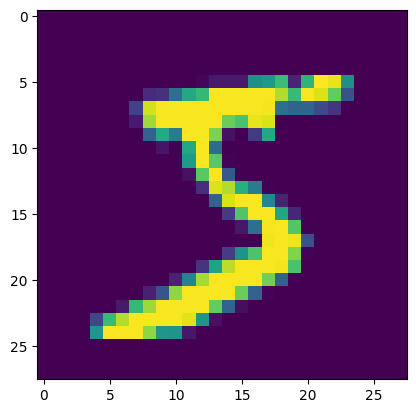

In [3]:
names = ["Ноль", "Один", "Два", "Три", "Четыре", "Пять", "Шесть", "Семь", "Восемь", "Девять"]
# Тут показан пример изображения
x_train = x_train / 255
x_test = x_test / 255
plt.figure()
plt.imshow(x_train[0])

In [4]:


model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)
                          ])



model.compile(optimizer=tf.keras.optimizers.SGD(), loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.fit(x_train, y_train, epochs=13)

Epoch 1/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9643 - loss: 0.1289
Epoch 2/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9656 - loss: 0.1237
Epoch 3/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9662 - loss: 0.1184
Epoch 4/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9675 - loss: 0.1153
Epoch 5/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9698 - loss: 0.1083
Epoch 6/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9716 - loss: 0.1024
Epoch 7/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9715 - loss: 0.1029
Epoch 8/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9718 - loss: 0.1018
Epoch 9/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9727 - loss: 0.0986
Epoch 10/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9756 - loss: 0.0916
Epoch 11/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9745 - loss: 0.0920
Epoch 12/17
1875/1875 ━━━━━━━━

In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9675 - loss: 0.1098
Test accuracy: 0.9717000126838684


In [8]:
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [9]:
names[np.argmax(predictions[0])]

'Семь'

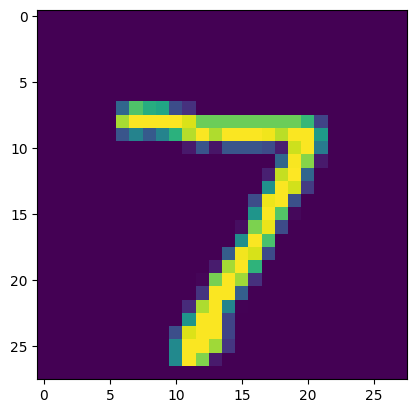

In [10]:
plt.figure()
plt.imshow(x_test[0])

##Тут можно посмотреть как это все работает, будут показаны график точности и вероятность успеха модели с самой картинкой тестового сета##

Цифра 0: вероятность 0.0856
Цифра 1: вероятность 0.2283
Цифра 2: вероятность 0.0858
Цифра 3: вероятность 0.0859
Цифра 4: вероятность 0.0857
Цифра 5: вероятность 0.0858
Цифра 6: вероятность 0.0856
Цифра 7: вероятность 0.0858
Цифра 8: вероятность 0.0859
Цифра 9: вероятность 0.0856
Предсказанная цифра: 1


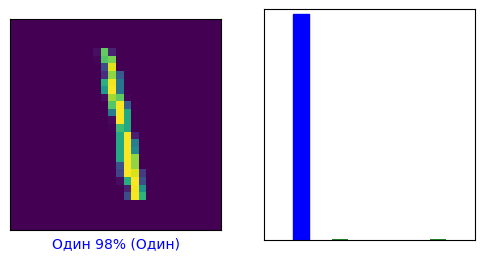

In [59]:
import random
random_numb = random.randint(0,9999)

def plot_image(ind, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(names[predicted_label],
                                100*np.max(predictions_array),
                                names[true_label]),
                                color=color)

def plot_value_array(ind, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#228228")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


probabilities = tf.nn.softmax(predictions[random_numb]).numpy()
sm=0
for i, prob in enumerate(probabilities):
    print(f'Цифра {i}: вероятность {prob:.4f}')
predicted_class = np.argmax(probabilities)
print(f'Предсказанная цифра: {predicted_class}')

i = random_numb
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)


In [ ]:
# Тут я попытался загрузить свое изображение, сделанное в paint, были установлены границы рисунка 28х28 пикселей, но почему-то вылезает ошибка, не тот формат данных и я все еще не могу понять почему так
from google.colab import files
from PIL import Image
import io
uploaded = files.upload()

for filename in uploaded.keys():
  img = Image.open(io.BytesIO(uploaded[filename]))
  img = img.convert('L')
  img_array = np.array(img)




Saving popa2.png to popa2 (4).png


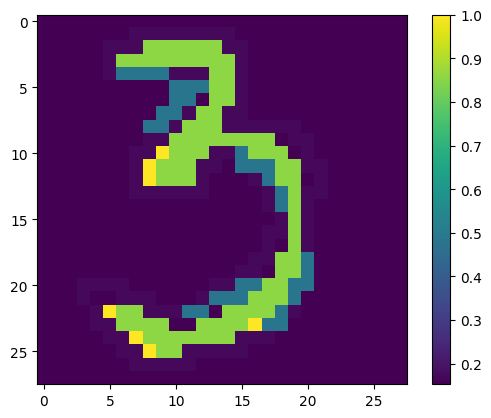

In [ ]:
img_array = img_array / 255

plt.figure()
plt.imshow(img_array)


In [ ]:
print(len(img_array[0]))


28


In [ ]:
print(x_test[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
predictions = model.predict(img_array)


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None